In [443]:
import intake
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import fsspec
import cv2
from matplotlib import animation
from IPython.display import HTML, display

xr.set_options(display_style='html')
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
plt.rcParams['figure.figsize'] = 12, 6

### load CMIP6

In [2]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
cat = col.search(experiment_id=['historical'], variable_id='fgco2',
                 grid_label='gn', table_id='Omon')

In [3]:
dset_dict = {}
for name, group in cat.df.groupby('source_id'):
    dsets = [xr.open_zarr(fsspec.get_mapper(zstore), consolidated=True)
             for zstore in group.zstore.values]
    try:
        dsets_aligned = xr.align(*dsets, join='exact')
        dset_dict[name] = xr.concat(dsets, dim='member')
        print(f'concatted {name}')
    except Exception as e:
        print(f'failed to concat {name}')
        print(e)

concatted ACCESS-ESM1-5
concatted BCC-CSM2-MR
concatted BCC-ESM1
concatted CESM2
concatted CESM2-FV2
concatted CESM2-WACCM
concatted CESM2-WACCM-FV2
concatted CNRM-ESM2-1
concatted CanESM5
concatted CanESM5-CanOE
concatted GISS-E2-1-G
concatted GISS-E2-1-G-CC
concatted IPSL-CM6A-LR
concatted MIROC-ES2L
concatted MPI-ESM-1-2-HAM
concatted MPI-ESM1-2-HR
concatted MPI-ESM1-2-LR
concatted MRI-ESM2-0
concatted NorCPM1
concatted NorESM2-LM
concatted NorESM2-MM
failed to concat UKESM1-0-LL
indexes along dimension 'time' are not equal


,Array,Chunk
Bytes,10.71 GB,58.98 MB
Shape,"(11, 1980, 384, 320)","(1, 120, 384, 320)"
Count,1044 Tasks,297 Chunks
Type,float32,numpy.ndarray


C:\Users\sukic\Anaconda3\envs\geosci\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


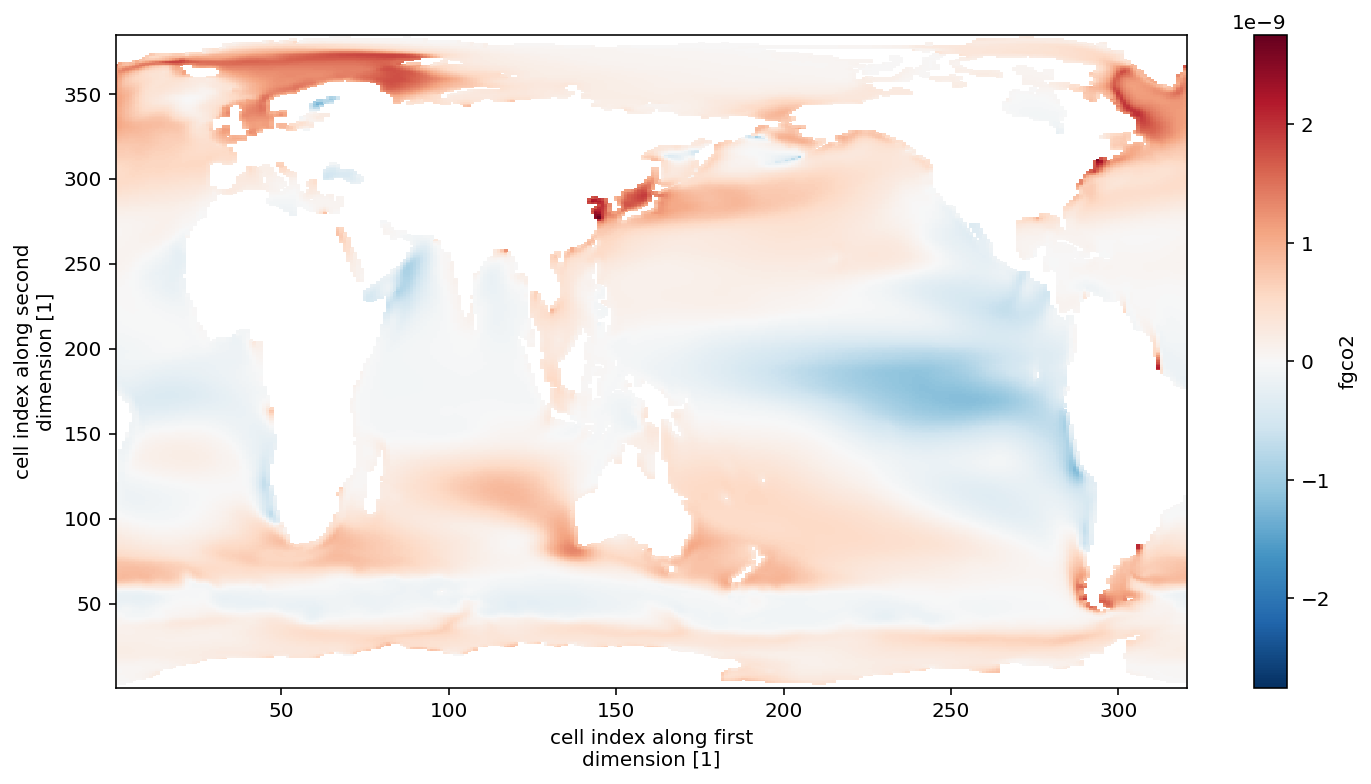

In [4]:
# look at one model
ds = dset_dict['CESM2']
display(ds)
# calculate ensemble mean annual flux in year 2000
fgco2 = ds.fgco2.sel(time='2000', method='nearest').mean(dim=['time', 'member']).load()
fgco2.plot()

# Biomes

### load netcdf biome file

In [5]:
nc_f = '../biomes/Time_Varying_Biomes.nc'
time_var_biomes = xr.open_dataset(nc_f)

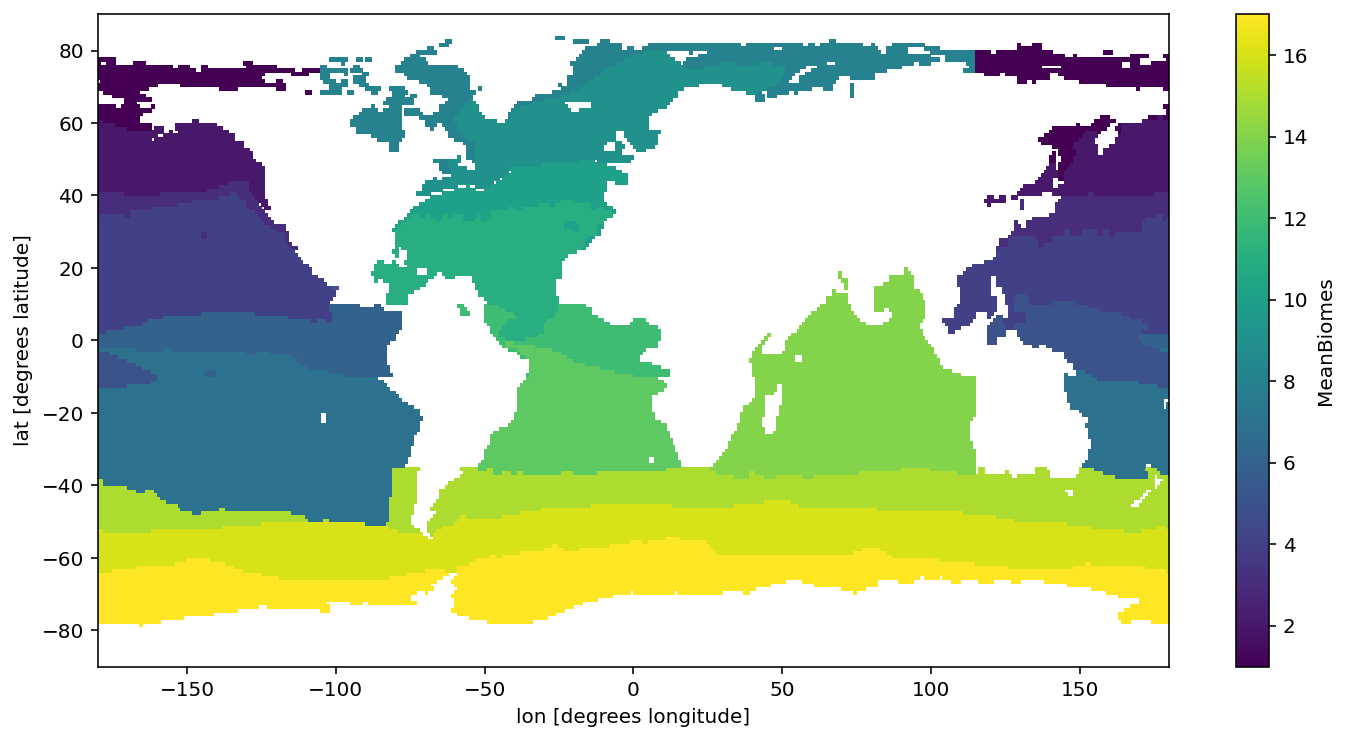

In [6]:
# the .T is to transpose MeanBiomes, so that 
# the longitude and latitude axes are oriented conventionally
mean_biomes = time_var_biomes.MeanBiomes.T
mean_biomes.plot()

In [7]:
# center for the Pacific Ocean
time_var_biomes = ( time_var_biomes.assign_coords(lon=(time_var_biomes.lon % 360))
                   .roll(lon=(time_var_biomes.dims['lon'] // 2),roll_coords=True) )

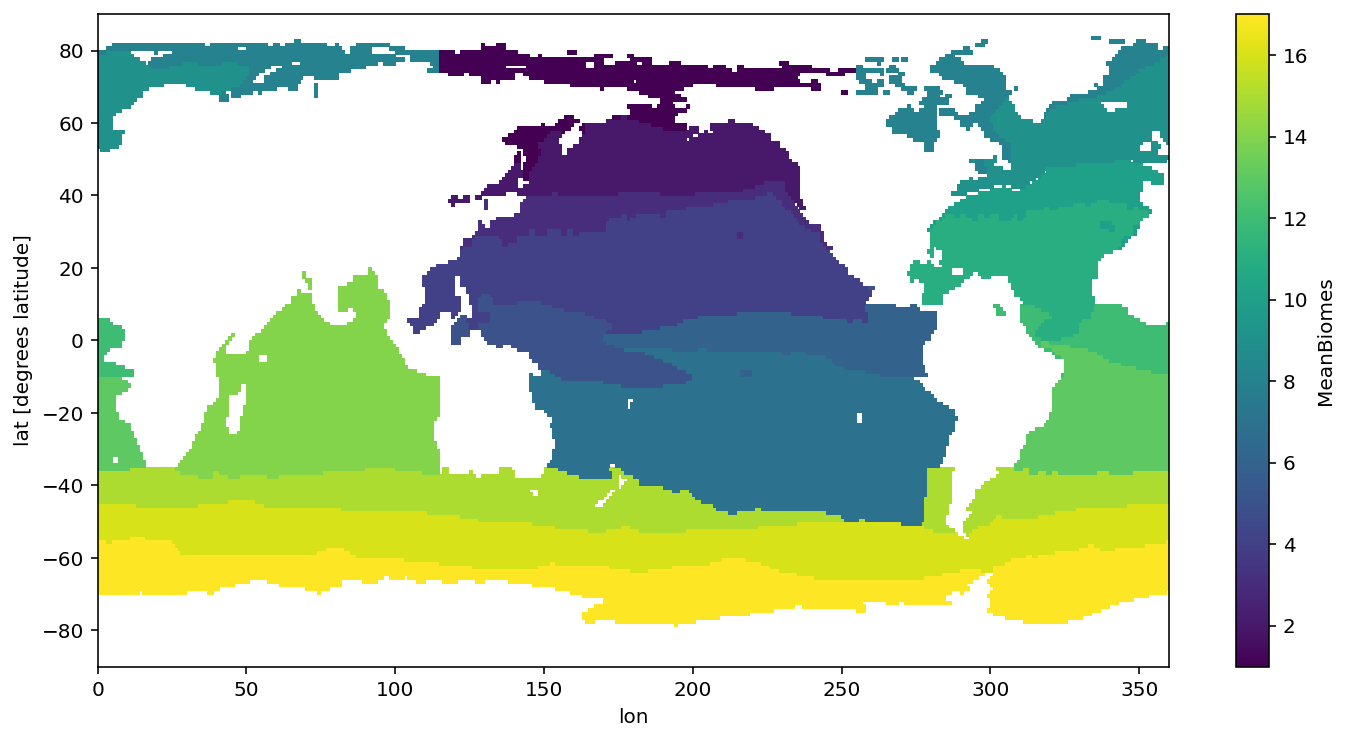

In [8]:
mean_biomes = time_var_biomes.MeanBiomes.T
mean_biomes.plot()

### Contour of specific biomes

In [9]:
def plot_biomes(biome_no, plot=True):
    '''
    Plots an ocean biome in a global context
    
    Parameters
    ----------
    biome_no : int
    plot : bool
    
    Returns
    -------
    g : plot
    biomes : array of all biomes
    '''
    mean_biomes.plot()
    g = plt.contour(mean_biomes.lon,mean_biomes.lat,
                    mean_biomes==biome_no,colors='black',linewidths=.5)
    
    
    if plot == False:
        plt.close()
    
    biomes = mean_biomes==biome_no
    
    return g, biomes

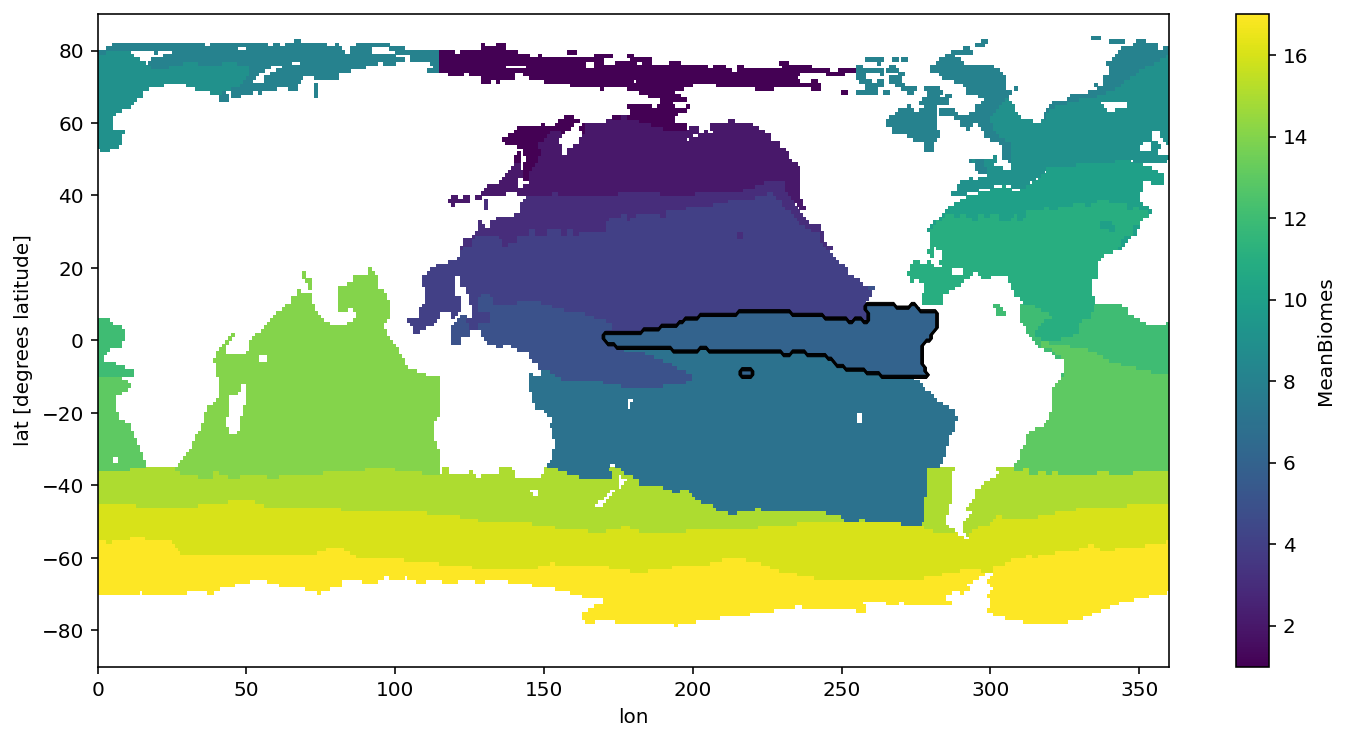

In [10]:
eep, eep_biome = plot_biomes(6, True)

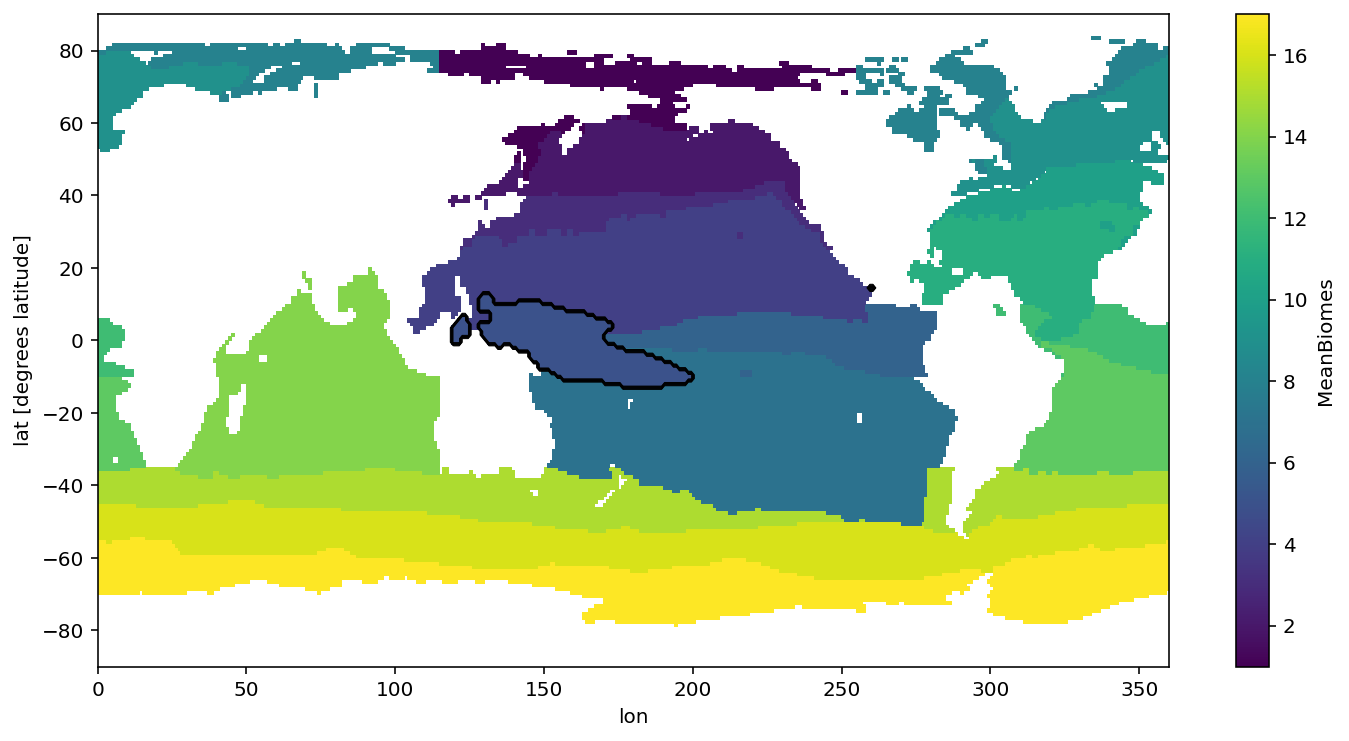

In [11]:
wep, wep_biome = plot_biomes(5, True)

### Make biomes into arrays

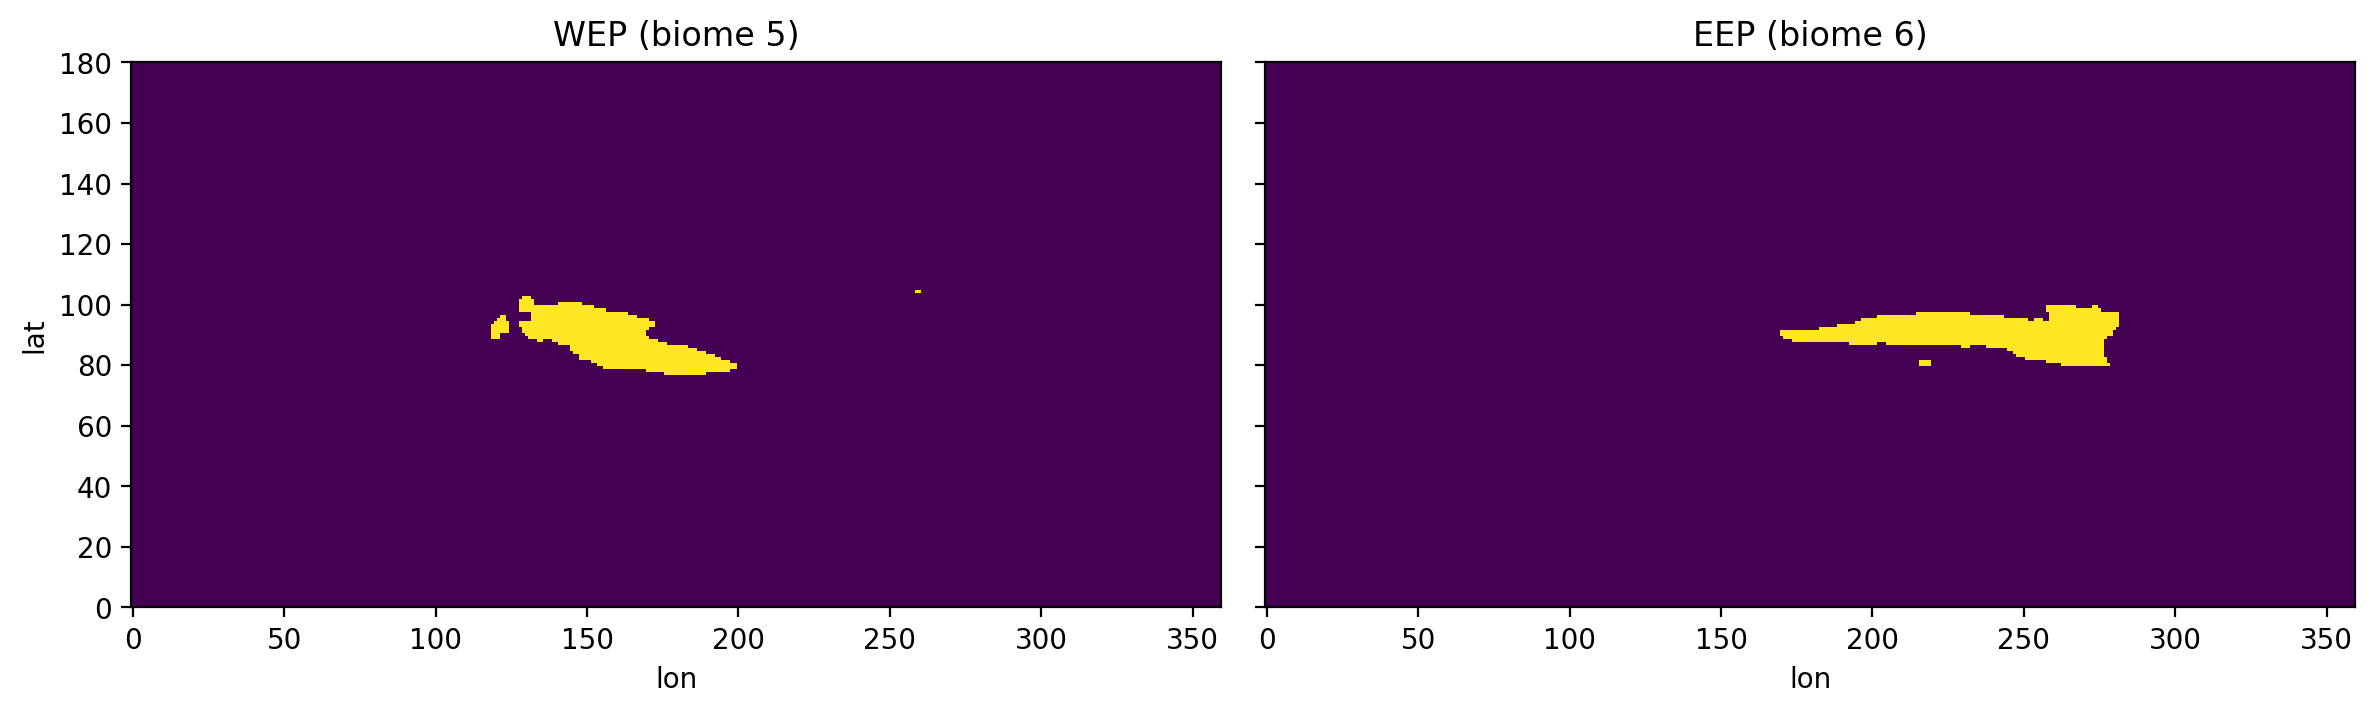

In [12]:
fig, axes = plt.subplots(nrows=1,ncols=2,dpi=100,sharey=True)

axes[0].imshow(wep_biome)
axes[1].imshow(eep_biome)


axes[0].set_title('WEP (biome 5)')
axes[1].set_title('EEP (biome 6)')

axes[0].set_ylabel('lat')
axes[0].set_xlabel('lon')
axes[1].set_xlabel('lon')
axes[1].set_ylim([0,180])
plt.tight_layout()

In [13]:
def make_biome_array(biome_no):
    '''
    Transforms a biome into an array that can be used in 
    func resize_biome()
    
    Parameters
    ----------
    biome_no : int
    
    Returns
    -------
    biomes : biome array
    '''
    
    # obtain biome array, without plotting
    wep, biome = plot_biomes(biome_no, False)
    
    # find indices of specific biome
    x, y = np.where(biome==1.)

    # make array for a specific biome
    biome = np.zeros((180,361))
    for i,v in zip(x,y):
        biome[i,v] = 1.
        
    return biome

In [14]:
wep = make_biome_array(5)
eep = make_biome_array(6)

### Resize biome masks to fit CMIP model grids

In [15]:
def resize_biome(biome_no, lon_dim, lat_dim, plot=True):
    '''
    Resize each biome to fit the a model grid in CMIP6
    
    E.g. for CESM2, lon_dim = 320 and lat_dim = 384
    
    Parameters
    ----------
    biome_no : int
    lon_dim : size of x (lon) dimension in CMIP6 model
    lat_dim : size of y (lat) dimension in CMIP6 model
    plot : bool
    
    Returns
    -------
    resized_biome : resized array of biome
    
    '''
    # represent biome as an array
    biome = make_biome_array(biome_no)
    
    # use package cv2 to resize by 2-D interpolation
    img = biome
    resized_biome = cv2.resize(img, dsize=(lon_dim, lat_dim),
                               interpolation=cv2.INTER_NEAREST)
    plt.imshow(resized_biome)
    plt.ylim([0,lat_dim])
    
    if plot == False:
        plt.close()
    
    return resized_biome

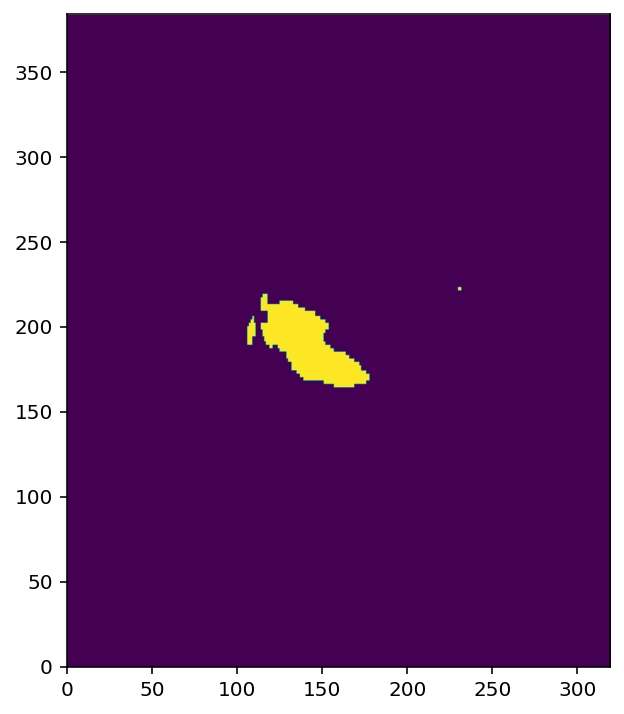

In [16]:
wep = resize_biome(5,np.shape(fgco2)[1],np.shape(fgco2)[0],True)

In [17]:
eep = resize_biome(6,np.shape(fgco2)[1],np.shape(fgco2)[0],False)

# Apply biome mask onto CMIP6 DataArray

In [18]:
# Roll/wrap fgco2 to match biome netcdf frame longitude bounds
fgco2_roll_lon = fgco2.roll(nlon= int((np.shape(fgco2)[1]/360) *                             
                            (fgco2[0,0].lon - 360)),
                            roll_coords=False)

da = fgco2_roll_lon

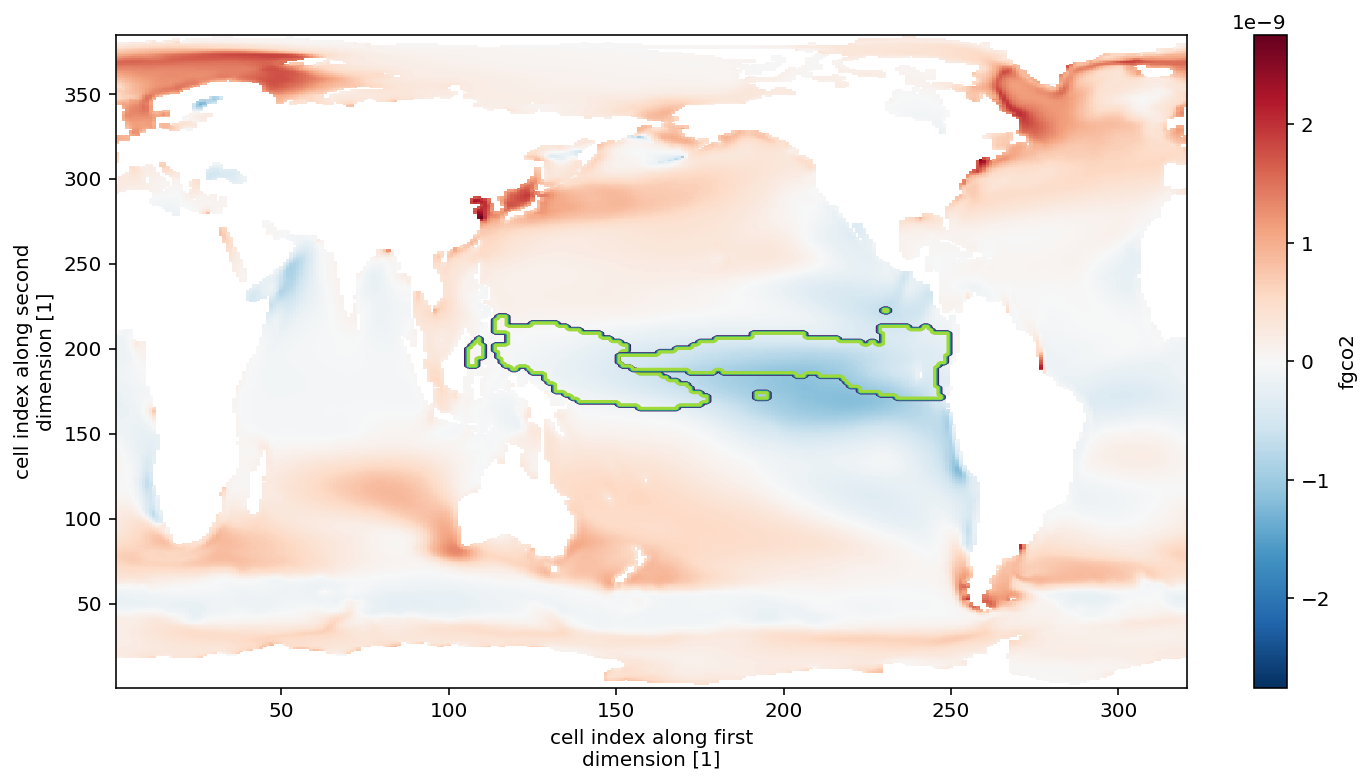

In [19]:
da.plot()
plt.contour(wep)
plt.contour(eep)

In [20]:
da['eqpac_mask'] = (da.dims,(wep + eep))

(100.0, 260.0)

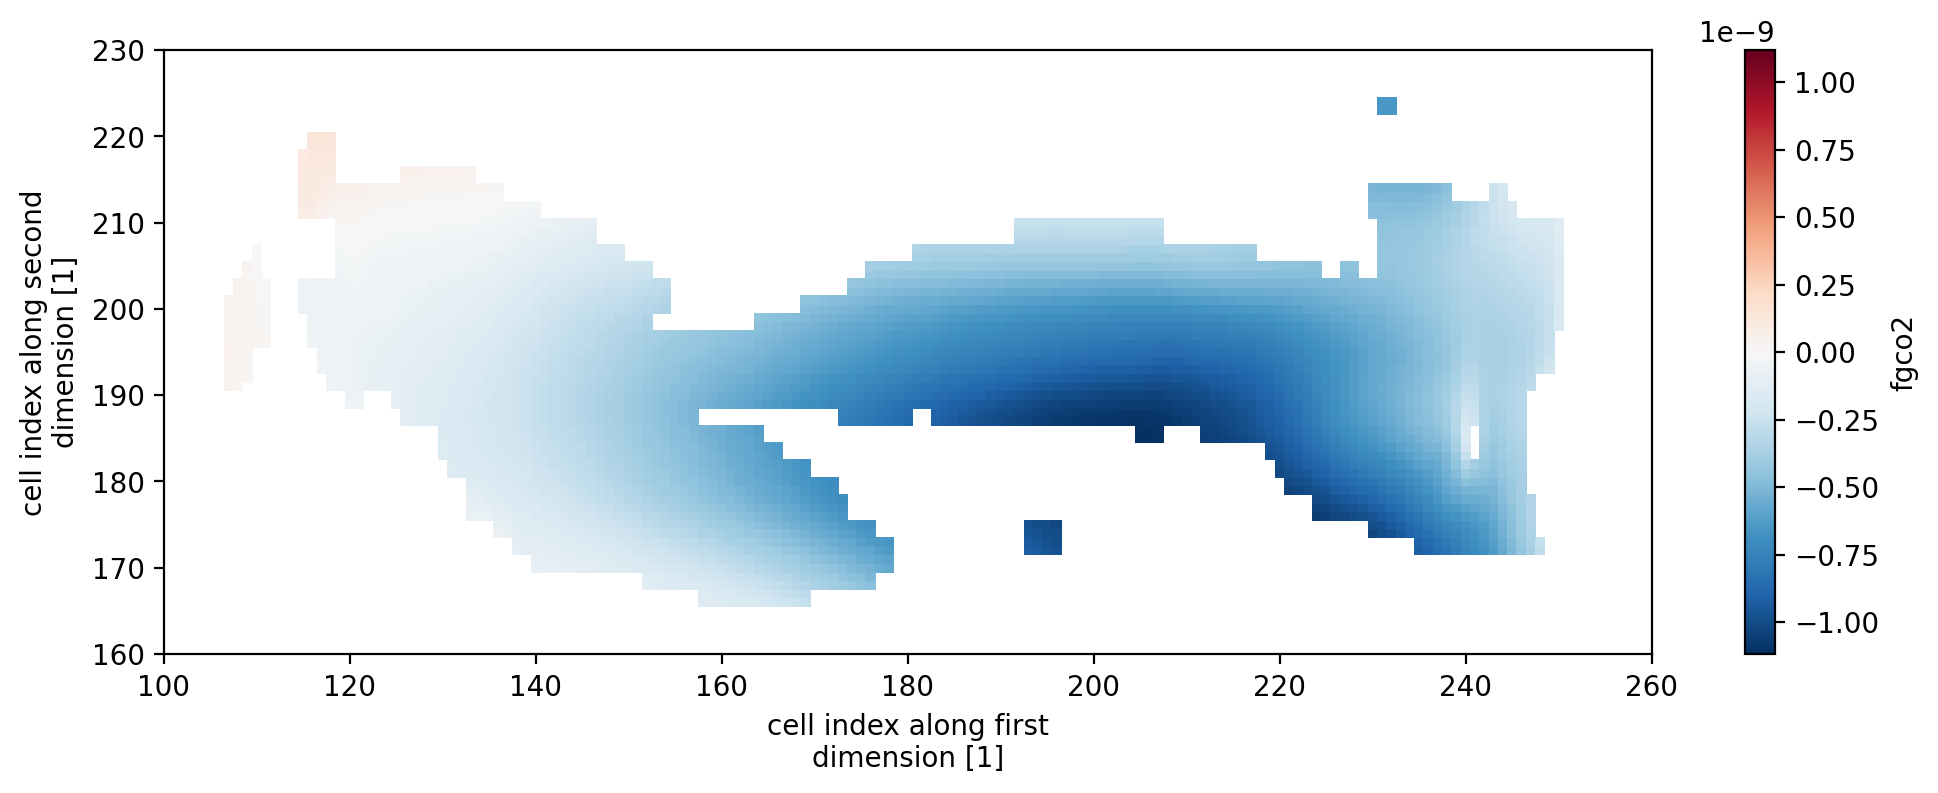

In [21]:
fig, axes = plt.subplots(figsize=(12,4),dpi=100)
da.where(da.eqpac_mask == 1.).plot(ax=axes)
axes.set_ylim([160,230])
axes.set_xlim([100,260])

# or a 10N to 10S band

Text(0.5, 0, 'longitude degrees')

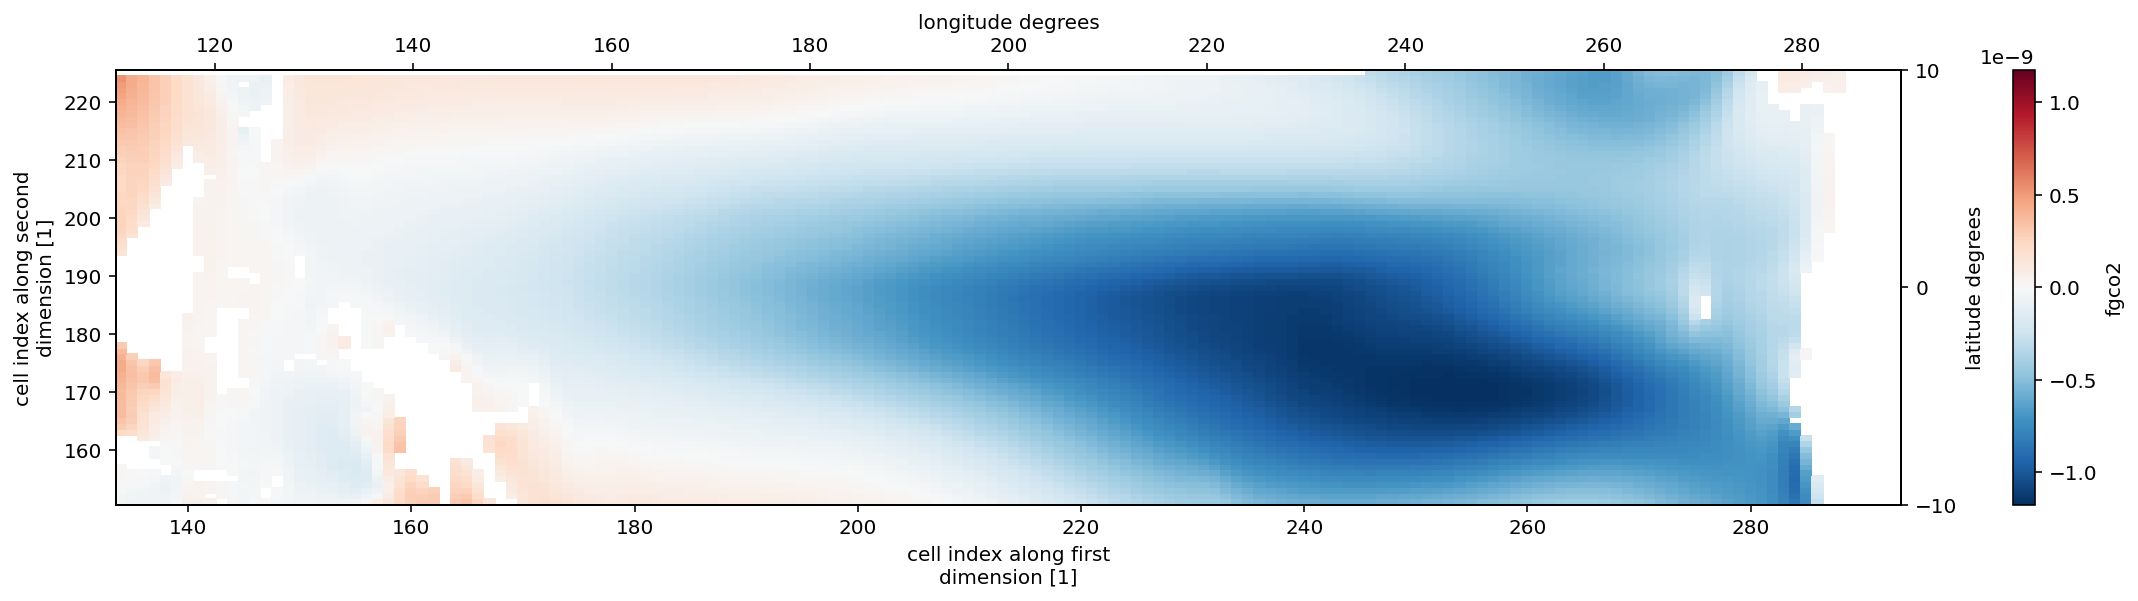

In [267]:
band = (fgco2.where(fgco2.lat<10, drop=True)
        .where(fgco2.lat>-10, drop=True)
        .where(fgco2.lon>110, drop=True)
        .where(fgco2.lon<290, drop=True))

fig, axes = plt.subplots(figsize=(20,4))

band.plot(ax=axes)

ax2 = axes.twinx()
ax2.set_ylim([-10,10])
ax2.set_yticks([-10,0,10])
ax2.set_ylabel('latitude degrees')

ax3 = axes.twiny()
ax3.set_xlim([110,290])
ax3.set_xlabel('longitude degrees')

In [302]:
box_mean = band.mean()
box_west_mean = band.where(band.lon >= 200).mean()
box_east_mean = band.where(band.lon < 200).mean()

In [303]:
# negative means outgassing
box_mean, box_west_mean, box_east_mean

(<xarray.DataArray 'fgco2' ()>
 array(-3.7485223e-10, dtype=float32),
 <xarray.DataArray 'fgco2' ()>
 array(-6.2171795e-10, dtype=float32),
 <xarray.DataArray 'fgco2' ()>
 array(-1.2899334e-10, dtype=float32))

## How can I best look at multiple years?

In [379]:
# el nino year
fgco2_2015 = ds.fgco2.sel(time=slice('1997','1998')).mean(dim=['time','member']).load()
# la nina year
fgco2_2010 = ds.fgco2.sel(time=slice('2010','2011')).mean(dim=['time','member']).load()

C:\Users\sukic\Anaconda3\envs\geosci\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\sukic\Anaconda3\envs\geosci\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Text(0.5, 1.0, '2010-2011 mean fgco2 = -3.037132e-10')

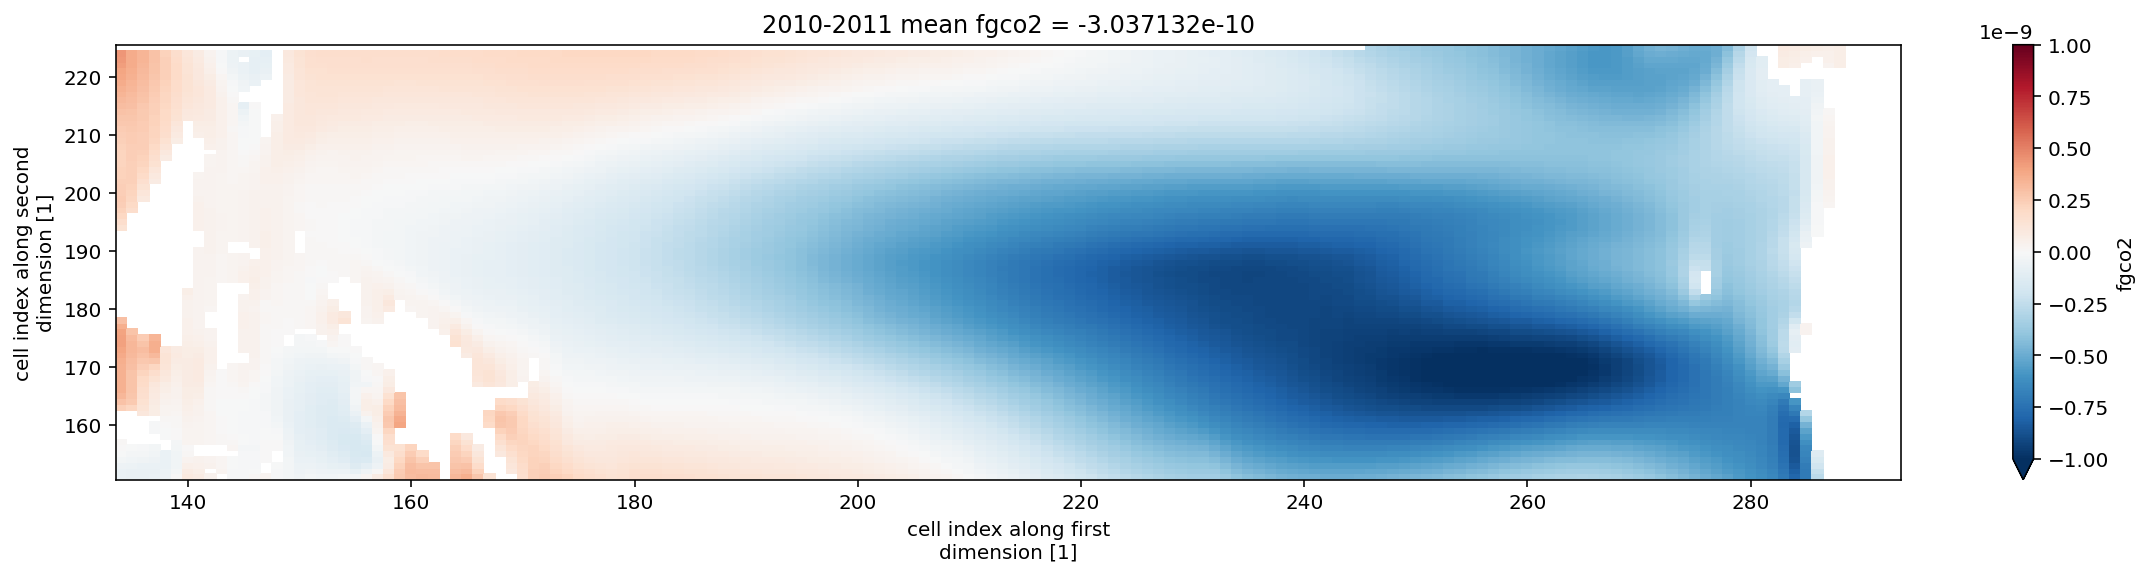

In [400]:
a = (fgco2_2010.where(fgco2.lat<10, drop=True)
        .where(fgco2.lat>-10, drop=True)
        .where(fgco2.lon>110, drop=True)
        .where(fgco2.lon<290, drop=True))
a.plot(figsize=(20,4), cmap='RdBu_r', vmax = 1e-9,vmin=-1e-9)
plt.title('2010-2011 mean fgco2 = '+str(a.mean().values))

Text(0.5, 1.0, '1997-1998 mean fgco2 = -3.4779857e-10')

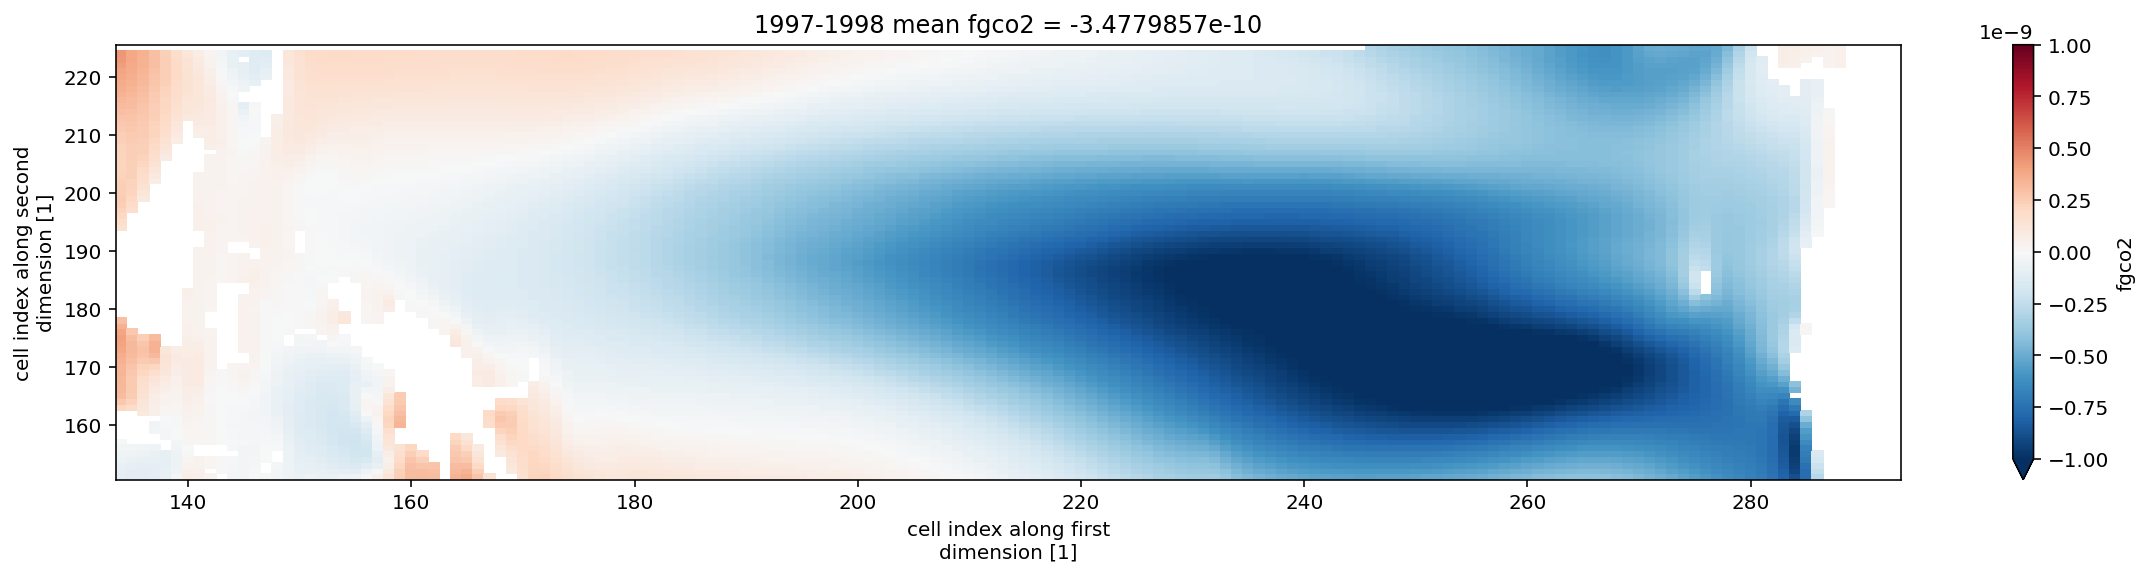

In [402]:
a = (fgco2_2015.where(fgco2.lat<10, drop=True)
        .where(fgco2.lat>-10, drop=True)
        .where(fgco2.lon>110, drop=True)
        .where(fgco2.lon<290, drop=True))
a.plot(figsize=(20,4), cmap='RdBu_r', vmax = 1e-9,vmin=-1e-9)
plt.title('1997-1998 mean fgco2 = '+str(a.mean().values))

#### Process (?)
    1. use data by the region of interest only
    2. for every 70-years, calculate the mean, with overlapping windows 
    3. for every 50-years, calculate the mean, with overlapping windows 
    4. for every 30-years, calculate the mean, with overlapping windows 
    5. for every 10-years, calculate the mean, with overlapping windows 
    6. for every year, calculate the mean, with overlapping windows of 3 months
    7. repeat for all models